In [0]:
# Import all libraries needed

In [0]:
!pip install category_encoders
!pip install eli5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from IPython.display import Image
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.utils.multiclass import unique_labels

In [0]:
# Load the dataset

In [0]:
names = ('Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', 
                 names=names)

In [0]:
# Exploring the dataset, checking for null values

In [0]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [0]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [0]:
# What is the mean baseline by just guessing, using 'Class'

In [0]:
df['Class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: Class, dtype: float64

In [0]:
# Mean baseline is 55% 'False' or Fraudulent note, just by guessing.
# We will use 'Class' as our target.

In [0]:
# Visualization of the Data using seaborn

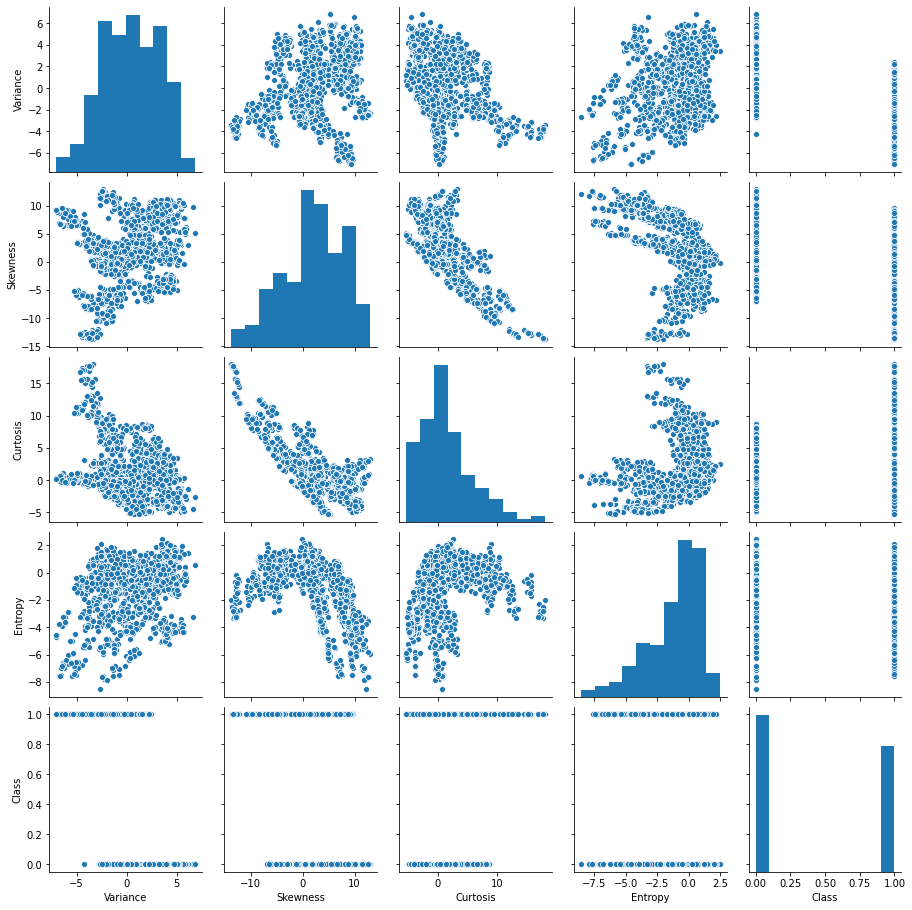

In [0]:
sns.pairplot(df)

In [0]:
# Choosing our target to be 'Class'

In [0]:
data_features = df.iloc[:, 0:4]

In [0]:
data_labels = df.iloc[:, 4]

In [0]:
# Train test split, and importing models.

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
train_features, test_features, train_labels, test_labels =train_test_split(data_features, data_labels, test_size=0.2, random_state=22)

In [0]:
print(train_features.shape)
print(test_features.shape)

(1097, 4)
(275, 4)


In [0]:
# First predictive model I use is RandomForest,
# I quite like this model, this is why I chose to begin with it.

In [0]:
rfc_object = rfc(n_estimators=200, random_state=0)

In [0]:
rfc_object.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
prediction_labels = rfc_object.predict(test_features)

In [0]:
print(classification_report(test_labels, prediction_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.99      0.99       125

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [0]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

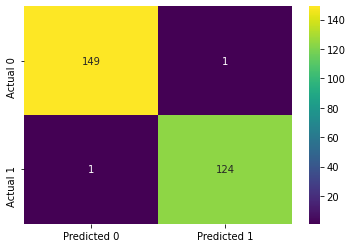

In [0]:
plot_confusion_matrix(test_labels, prediction_labels)

In [0]:
print(accuracy_score(test_labels, prediction_labels))

0.9927272727272727


In [0]:
# Random forest has a 99% accuracy, 
# I think this will be the best predictive model.

In [0]:
# Comparing different ML Algorithms

In [0]:
# Here is a confusion matrix, accuracy score, and
# classification report on LogisticRegression.
LogReg = LogisticRegression()
LogReg.fit(data_features, data_labels)
predicting = LogReg.predict(test_features)
print(accuracy_score(test_labels, predicting))
print(classification_report(test_labels, predicting))

0.9963636363636363
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       1.00      0.99      1.00       125

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



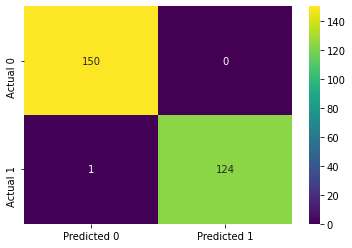

In [0]:
plot_confusion_matrix(test_labels, predicting)

In [0]:
svc_object = SVC() 

svc_object.fit(train_features, train_labels)

predicted_labels = svc_object.predict(test_features) 

In [0]:
print(accuracy_score(test_labels, predicted_labels))
print(confusion_matrix(test_labels, predicted_labels))
print(classification_report(test_labels, predicted_labels))

1.0
[[150   0]
 [  0 125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       125

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



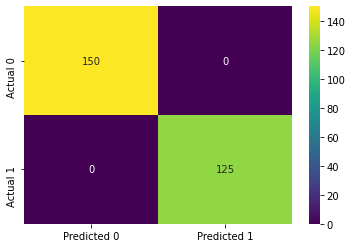

In [0]:
plot_confusion_matrix(test_labels, predicted_labels)

In [0]:
models = []
models.append(('DecTree', DecisionTreeClassifier()))
models.append(('RFC', rfc()))
models.append(('LogReg', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# For loop to evaluate each model listed
result = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_result = cross_val_score(model, train_features, train_labels, cv=kfold, scoring='accuracy')
  # cross val score
  result.append(cv_result)
  names.append(name)
  message = "%s = %f (%f)" % (name, cv_result.mean(), cv_result.std())
  print(message)

DecTree = 0.979041 (0.010839)
RFC = 0.990876 (0.008150)
LogReg = 0.987248 (0.009278)
NB = 0.843178 (0.035948)
SVM = 0.997273 (0.008182)


In [0]:
# Each model has a rather high score, Naive Bayes had the lowest score,
# With the highest standard deviation.
# See the visualization below of the comparison of these models.

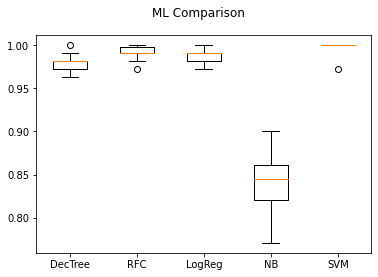

In [0]:
fig = plt.figure()
fig.suptitle('ML Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()